In [52]:
import os
from collections.abc import Callable

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from matplotlib.figure import Figure

DATA_SRC = os.path.join("..", "Data")

path = os.path.join(DATA_SRC, "CSV", "train.csv")

data_df = pd.read_csv(path)


def filter_bad_data(df):
    return df[
        (df["Physical-BMI"] > 0)
        & (df["BIA-BIA_Fat"] > 0)
        & (df["Physical-HeartRate"] > 10)
        & (df["Physical-Systolic_BP"] > 10)
        & (df["PCIAT-PCIAT_Total"].between(0, 100))
    ]


def filter_outliers(df: pd.DataFrame, column: list[str], percentile: float = 0.95) -> pd.DataFrame:
    min_percentil = (1 - percentile) / 2
    max_percentil = percentile + min_percentil

    final_df = df

    for col in column:
        min_value = df[col].quantile(min_percentil)
        max_value = df[col].quantile(max_percentil)
        final_df = final_df[(final_df[col] > min_value) & (final_df[col] < max_value)]

    return final_df


data_df = filter_bad_data(data_df)


# Estudios Individuales


In [53]:
compare_functions: list[Callable[[dict[str, pd.DataFrame], Axes], None]] = []


## Carlos


### Estudio X


## Jose Antonio


### Estudio Y


## Santiago


### Estudio Z

In [54]:
def pciat(df: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas de violines para todos los Dataframes en
    la misma grafica diferenciados por colores comparando el campo Physical-BMI
    """
    COLUMNS = "PCIAT-PCIAT_Total"
    data = [df[COLUMNS] for df in df.values()]

    quantiles = [[0.25, 0.5, 0.75] for _ in range(len(data))]
    parts = ax.violinplot(data, showmeans=True, quantiles=quantiles)
    quantile = parts["cquantiles"]
    quantile.set_linestyle("--")

    center = parts["cbars"]
    center.set_linewidth(0.5)

    mean = parts["cmeans"]
    mean.set_edgecolor("yellow")
    mean.set_label("Mean")

    ax.set_xticks(range(1, len(df) + 1))
    ax.set_xticklabels(df.keys())
    ax.set_ylabel("PCIAT-PCIAT_Total")


compare_functions.append(pciat)


def bmi(df: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas de violines para todos los Dataframes en
    la misma grafica diferenciados por colores comparando el campo Physical-BMI
    """
    COLUMNS = "Physical-BMI"
    data = [filter_outliers(df, [COLUMNS]) for df in df.values()]
    data = [df[COLUMNS] for df in data]

    quantiles = [[0.25, 0.5, 0.75] for _ in range(len(data))]
    parts = ax.violinplot(data, showmeans=True, quantiles=quantiles)
    quantile = parts["cquantiles"]
    quantile.set_linestyle("--")

    center = parts["cbars"]
    center.set_linewidth(0.5)

    mean = parts["cmeans"]
    mean.set_edgecolor("yellow")
    mean.set_label("Mean")

    ax.set_xticks(range(1, len(df) + 1))
    ax.set_xticklabels(df.keys())
    ax.set_ylabel("Physical-BMI")


compare_functions.append(bmi)


def fat(df: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas de violines para todos los Dataframes en
    la misma grafica diferenciados por colores comparando el campo BIA-BIA_Fat
    """

    def compose_values(df):
        total = df["BIA-BIA_Fat"] + df["BIA-BIA_FFM"]
        return (df["BIA-BIA_Fat"] / total) * 100

    COLUMNS = ["BIA-BIA_FFM", "BIA-BIA_Fat"]
    data = [filter_outliers(df, COLUMNS) for df in df.values()]
    data = [compose_values(df[COLUMNS]) for df in data]

    quantiles = [[0.25, 0.5, 0.75] for _ in range(len(data))]
    parts = ax.violinplot(data, showmeans=True, quantiles=quantiles)
    quantile = parts["cquantiles"]
    quantile.set_linestyle("--")

    center = parts["cbars"]
    center.set_linewidth(0.5)

    mean = parts["cmeans"]
    mean.set_edgecolor("yellow")
    mean.set_label("Mean")

    ax.set_xticks(range(1, len(df) + 1))
    ax.set_xticklabels(df.keys())
    ax.set_ylabel("Fat %")


compare_functions.append(fat)


def bpm(df: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas de violines para todos los Dataframes en
    la misma grafica diferenciados por colores comparando el campo Physical-HeartRate
    """
    COLUMNS = "Physical-HeartRate"
    data = [filter_outliers(df, [COLUMNS]) for df in df.values()]
    data = [df[COLUMNS] for df in data]

    quantiles = [[0.25, 0.5, 0.75] for _ in range(len(data))]
    parts = ax.violinplot(data, showmeans=True, quantiles=quantiles)
    quantile = parts["cquantiles"]
    quantile.set_linestyle("--")

    center = parts["cbars"]
    center.set_linewidth(0.5)

    mean = parts["cmeans"]
    mean.set_edgecolor("yellow")
    mean.set_label("Mean")

    ax.set_xticks(range(1, len(df) + 1))
    ax.set_xticklabels(df.keys())
    ax.set_ylabel("Physical-HeartRate")


compare_functions.append(bpm)


def systolic(df: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas de violines para todos los Dataframes en
    la misma grafica diferenciados por colores comparando el campo Physical-Systolic_BP
    """
    COLUMNS = "Physical-Systolic_BP"
    data = [filter_outliers(df, [COLUMNS]) for df in df.values()]
    data = [df[COLUMNS] for df in data]

    quantiles = [[0.25, 0.5, 0.75] for _ in range(len(data))]
    parts = ax.violinplot(data, showmeans=True, quantiles=quantiles)
    quantile = parts["cquantiles"]
    quantile.set_linestyle("--")

    center = parts["cbars"]
    center.set_linewidth(0.5)

    mean = parts["cmeans"]
    mean.set_edgecolor("yellow")
    mean.set_label("Mean")

    ax.set_xticks(range(1, len(df) + 1))
    ax.set_xticklabels(df.keys())
    ax.set_ylabel("Physical-Systolic_BP")


compare_functions.append(systolic)


def bmi_bpm(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-BMI y Phisical-HeartRate
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    for i, (name, df) in enumerate(dfs.items()):
        data = filter_outliers(df, ["Physical-BMI", "Physical-HeartRate"])
        ax.scatter(
            data["Physical-BMI"],
            data["Physical-HeartRate"],
            label=name,
            color=colormap(i),
        )

    ax.set_xlabel("Physical-BMI")
    ax.set_ylabel("Physical-HeartRate")
    ax.legend()


compare_functions.append(bmi_bpm)


def bmi_systolic(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-Systolic_BP and BIA-BIA_BMI
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    for i, (name, df) in enumerate(dfs.items()):
        data = filter_outliers(df, ["Physical-Systolic_BP", "BIA-BIA_BMI"])
        ax.scatter(
            data["BIA-BIA_BMI"],
            data["Physical-Systolic_BP"],
            label=name,
            color=colormap(i),
        )

    ax.set_xlabel("BIA-BIA_BMI")
    ax.set_ylabel("Physical-Systolic")
    ax.legend()


compare_functions.append(bmi_systolic)


def bmi_fat(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-BMI y BIA-BIA_Fat
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    def compose_values(df):
        total = df["BIA-BIA_Fat"] + df["BIA-BIA_FFM"]
        return (df["BIA-BIA_Fat"] / total) * 100

    for i, (name, df) in enumerate(dfs.items()):
        data = filter_outliers(df, ["Physical-BMI", "BIA-BIA_Fat", "BIA-BIA_FFM"])
        ax.scatter(
            data["Physical-BMI"],
            compose_values(data),
            label=name,
            color=colormap(i),
        )

    ax.set_xlabel("Physical-BMI")
    ax.set_ylabel("BIA-BIA_Fat")
    ax.legend()


compare_functions.append(bmi_fat)


def fat_bpm(dfs: dict[str, pd.DataFrame], ax: Axes):
    """Genera graficas comparativas para todos los Dataframes
    en la misma grafica diferenciados por colores
    comparando (x,y) los campos Physical-HeartRate y BIA-BIA_Fat
    """
    colormap = plt.get_cmap("tab20", len(dfs))

    def compose_values(df):
        total = df["BIA-BIA_Fat"] + df["BIA-BIA_FFM"]
        return (df["BIA-BIA_Fat"] / total) * 100

    for i, (name, df) in enumerate(dfs.items()):
        data = filter_outliers(df, ["Physical-HeartRate", "BIA-BIA_Fat", "BIA-BIA_FFM"])
        ax.scatter(
            compose_values(data),
            data["Physical-HeartRate"],
            label=name,
            color=colormap(i),
        )

    ax.set_xlabel("BIA-BIA_Fat")
    ax.set_ylabel("Physical-HeartRate")
    ax.legend()


compare_functions.append(fat_bpm)


## Ejecucion de redes


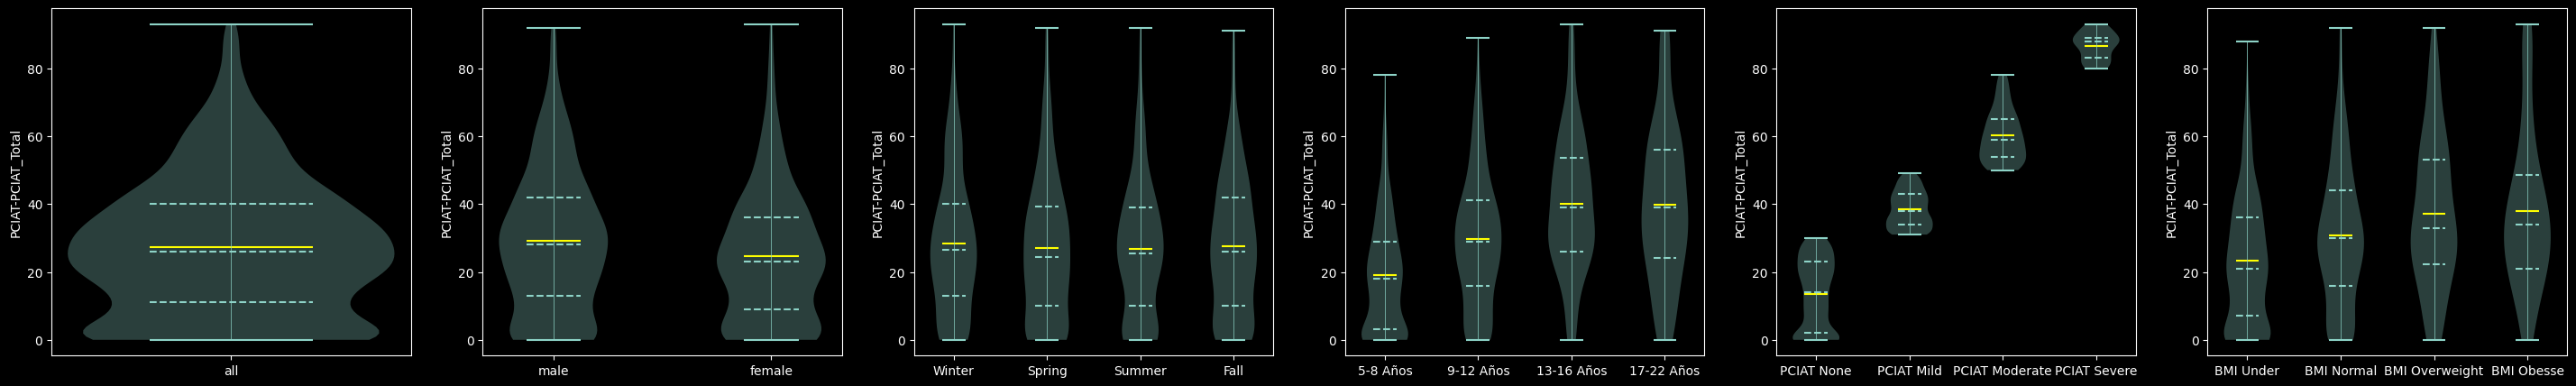

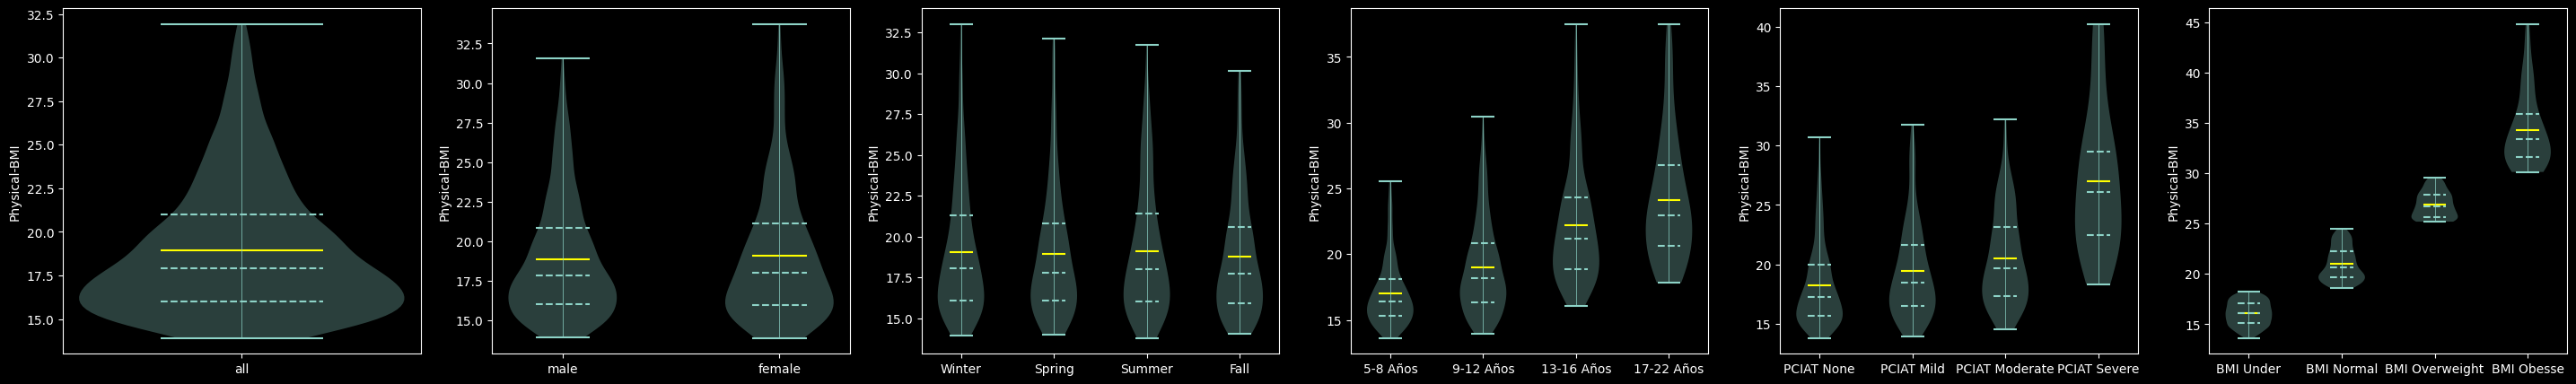

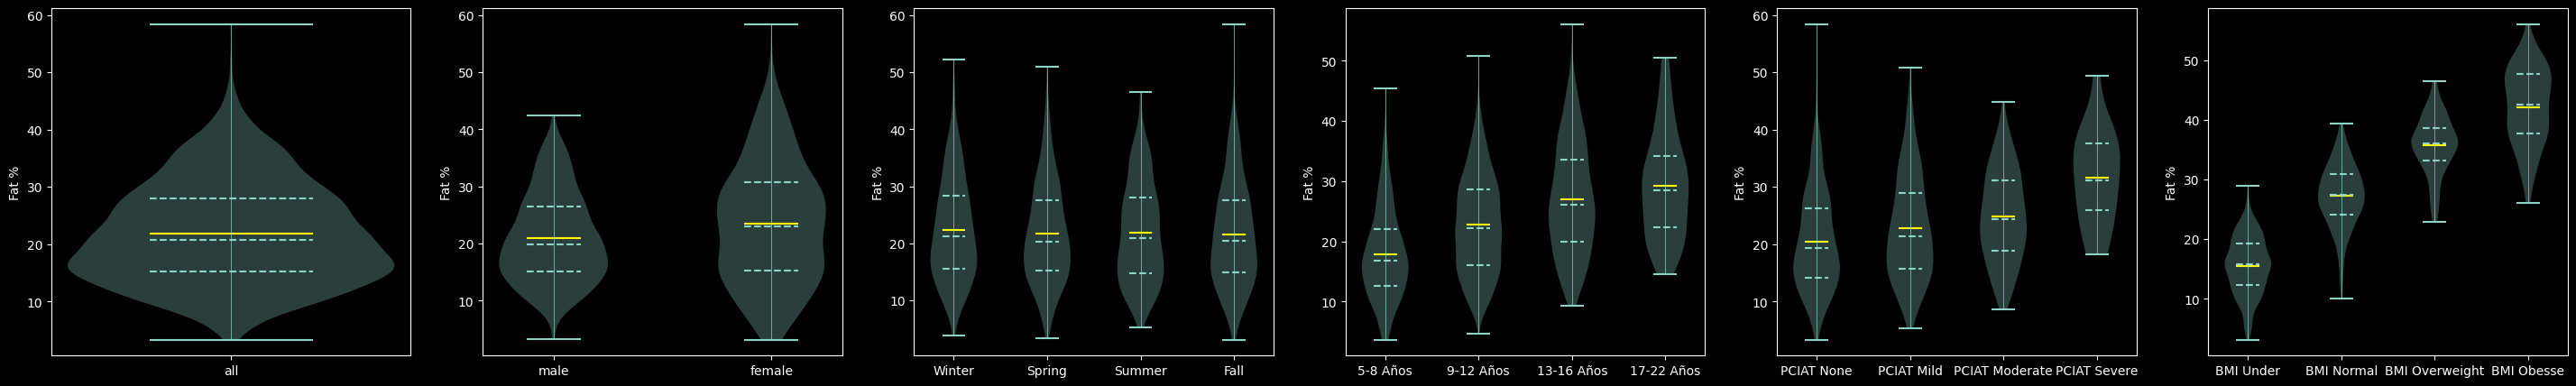

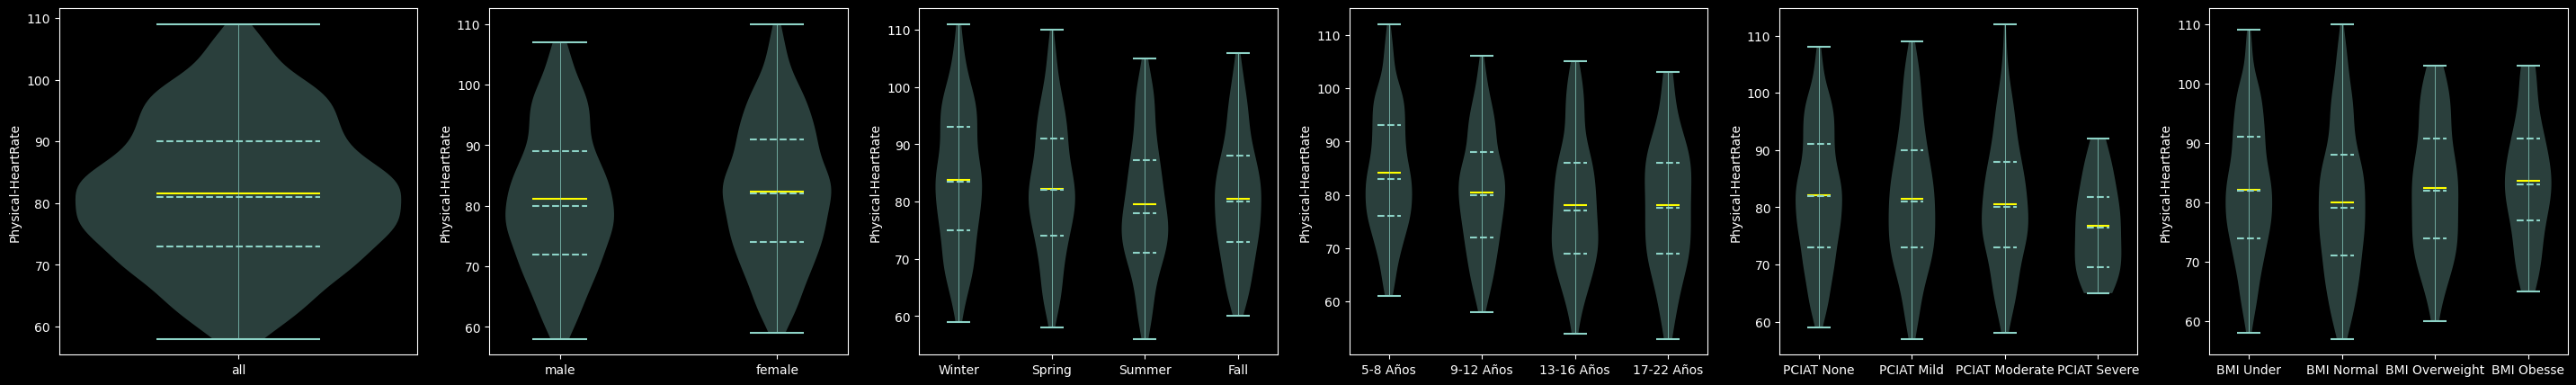

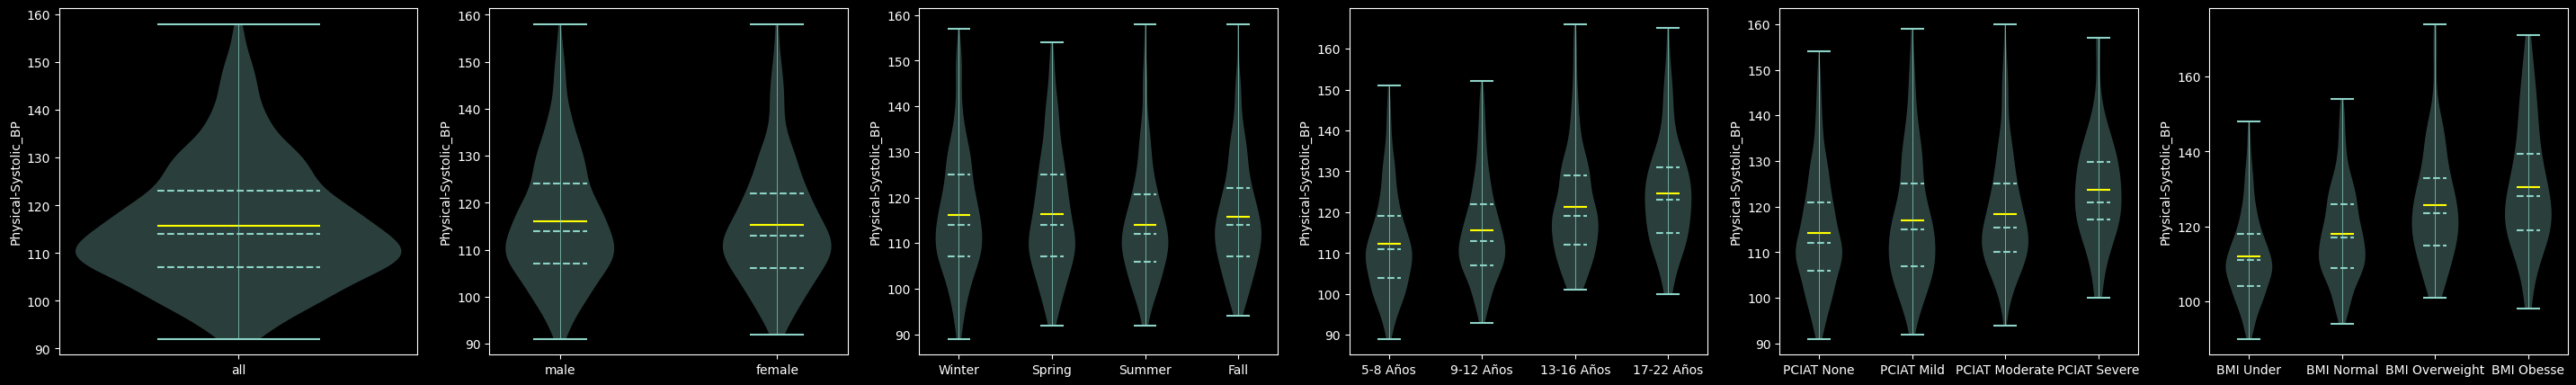

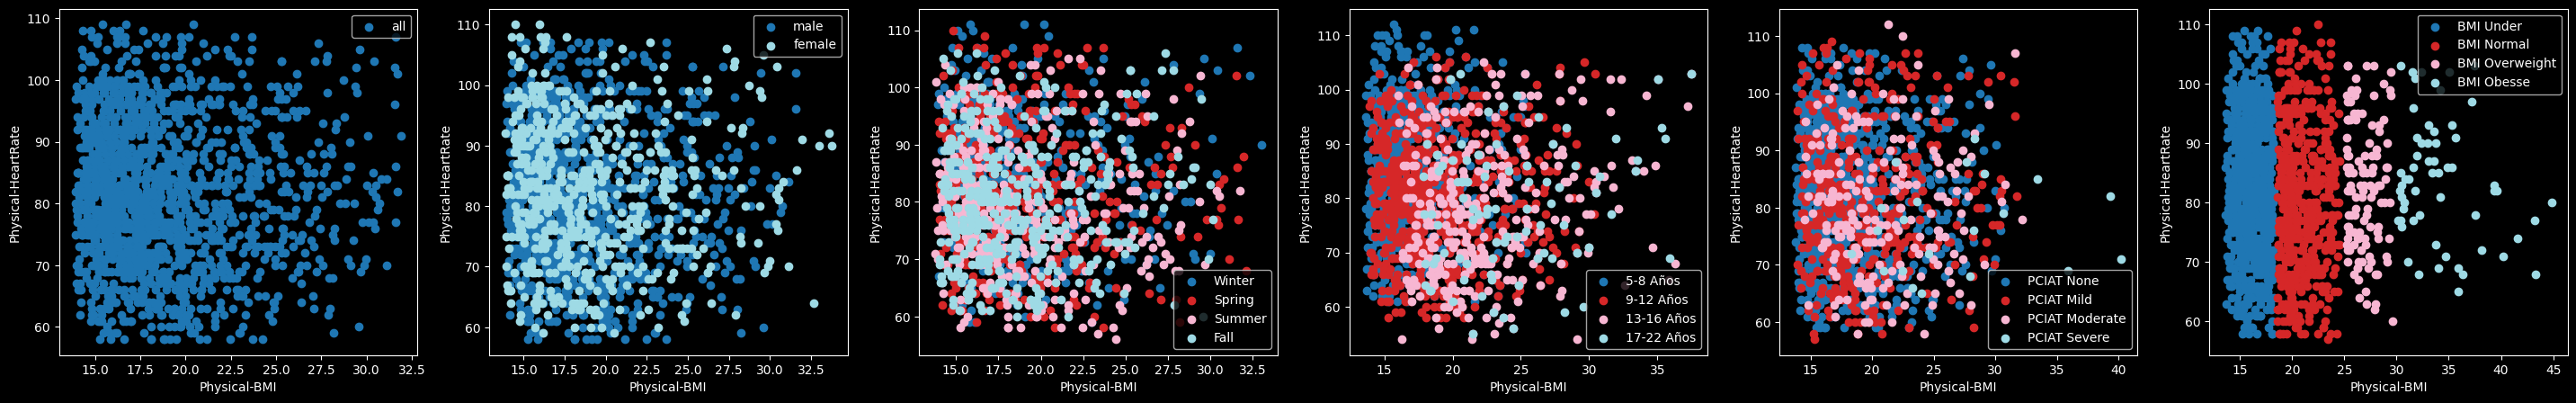

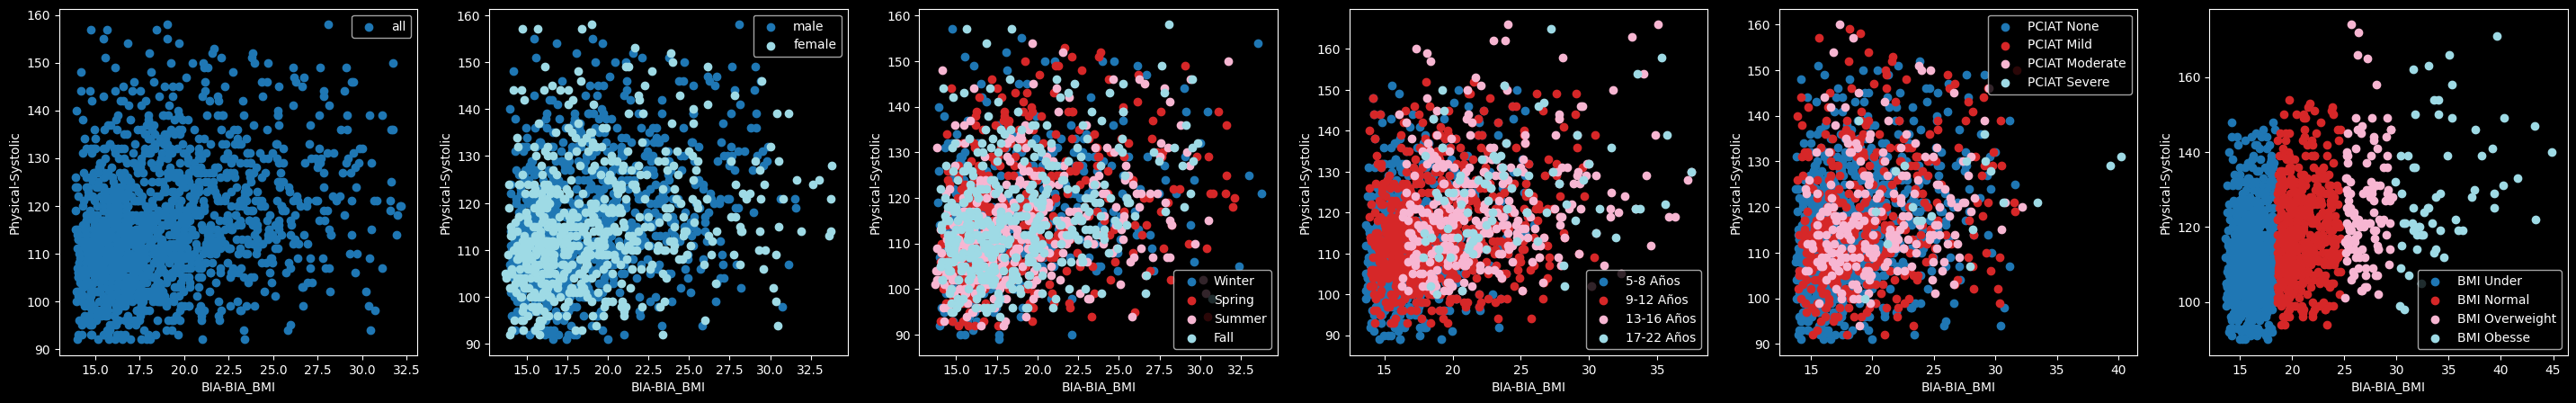

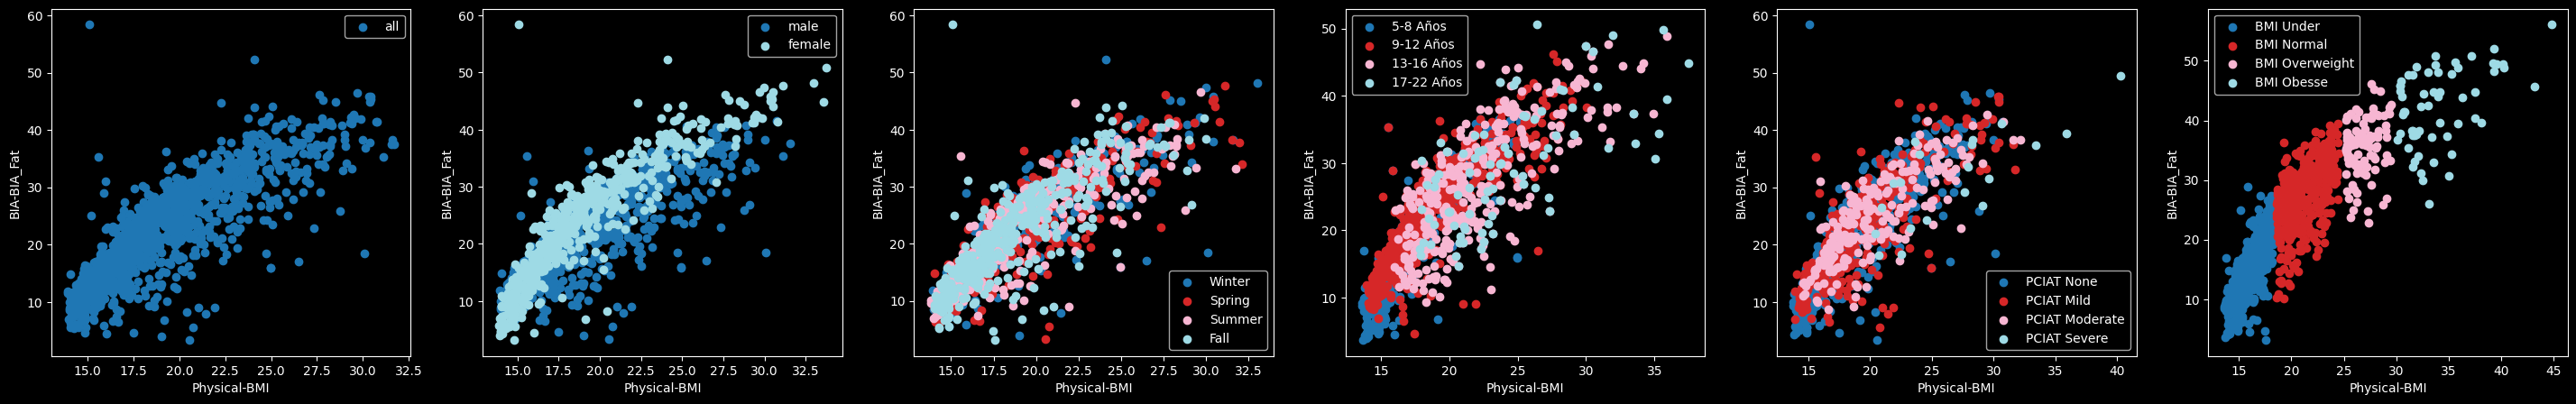

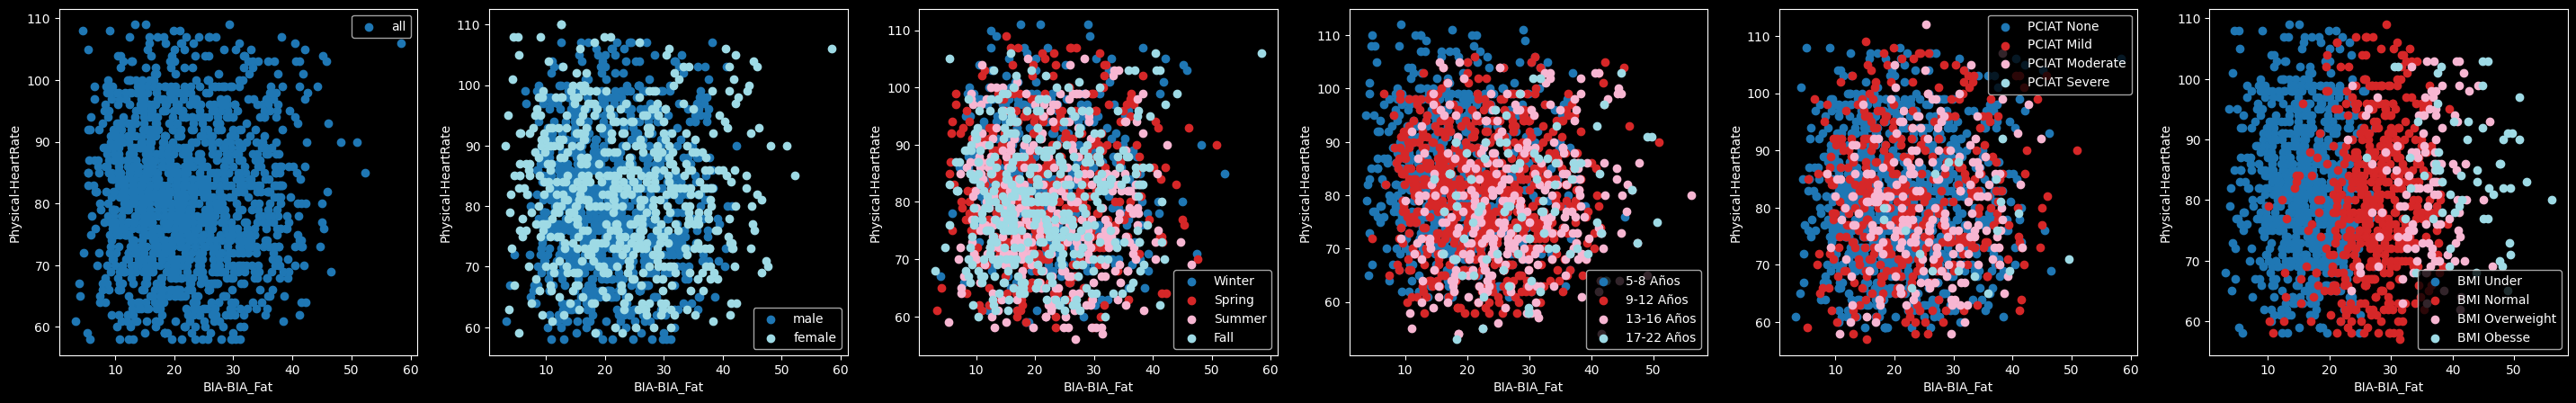

In [55]:
comparative_data: list[dict[str, pd.DataFrame]] = []

# COMPARACIONS 1
data_dict = {"all": data_df}
comparative_data.append(data_dict)

# COMPARACIONS 2
data_dict = {}
data_dict["male"] = data_df[data_df["Basic_Demos-Sex"] == 0]
data_dict["female"] = data_df[data_df["Basic_Demos-Sex"] == 1]
comparative_data.append(data_dict)

# COMPARACIONS 3
data_dict = {}

data_dict["Winter"] = data_df[data_df["Physical-Season"] == "Winter"]
data_dict["Spring"] = data_df[data_df["Physical-Season"] == "Spring"]
data_dict["Summer"] = data_df[data_df["Physical-Season"] == "Summer"]
data_dict["Fall"] = data_df[data_df["Physical-Season"] == "Fall"]
comparative_data.append(data_dict)

# COMPARACIONS 4
data_dict = {}
data_dict["5-8 Años"] = data_df[data_df["Basic_Demos-Age"].between(5, 9)]
data_dict["9-12 Años"] = data_df[data_df["Basic_Demos-Age"].between(9, 13)]
data_dict["13-16 Años"] = data_df[data_df["Basic_Demos-Age"].between(13, 17)]
data_dict["17-22 Años"] = data_df[data_df["Basic_Demos-Age"].between(17, 23)]
comparative_data.append(data_dict)

# COMPARACIONS 5
data_dict = {}
data_dict["PCIAT None"] = data_df[data_df["PCIAT-PCIAT_Total"].between(0, 30)]
data_dict["PCIAT Mild"] = data_df[data_df["PCIAT-PCIAT_Total"].between(31, 49)]
data_dict["PCIAT Moderate"] = data_df[data_df["PCIAT-PCIAT_Total"].between(50, 79)]
data_dict["PCIAT Severe"] = data_df[data_df["PCIAT-PCIAT_Total"].between(80, 100)]
comparative_data.append(data_dict)


# COMPARACIONS 6
data_dict = {}
data_dict["BMI Under"] = data_df[data_df["Physical-BMI"] < 18.4]
data_dict["BMI Normal"] = data_df[data_df["Physical-BMI"].between(18.5, 24.9)]
data_dict["BMI Overweight"] = data_df[data_df["Physical-BMI"].between(25, 29.9)]
data_dict["BMI Obesse"] = data_df[data_df["Physical-BMI"] > 30]
comparative_data.append(data_dict)

for compare_function in compare_functions:
    fig, ax = plt.subplots(1, len(comparative_data), figsize=(len(comparative_data) * 6, 5))
    for i, data_dict in enumerate(comparative_data):
        compare_function(data_dict, ax[i])
